# Predicting heart disease using ML
In this project we use machine learning and data science libraries, and try to build a ML model that can predict whether a person has heart disease or not. We use real-world data,that has also been trained and tested by working professionals.

we will be following these steps:



1.Problem definition    




2.Data




3.Evaluation



4.Features



5.Modelling



6.Experimentation

# 1.Problem definition 
Given a file of clinical data,can we predict wheteher a patient has heart disease or not?

# 2. Data
we use data set by UCI(Cleaveland), in kaggle.

# 3. Evaluation
We are aiming for 90-95%(the latter is preferred), if we reach this goal we will be pursuing the project further.

# 4.Features
    **These are the features we will be using throughout the project**
age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

and a few more...


## Preparing the notebook, using:pandas,matplotlib and Numpy

In [2]:
# regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##the below line is used to display plots in notebook
%matplotlib inline 

In [3]:
# models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# models for evaluating models(feels like deja vu, no?)
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score,f1_score,plot_roc_curve

# Load data 


In [5]:
df = pd.read_csv("heart-disease.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape

(303, 14)

In [7]:
# EDA
##here our aim is to understand the data and basically underatsnd the domain of the problem
df.shape
df.head(10)
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#number of classes i.e how many have heart disease and how many do not
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

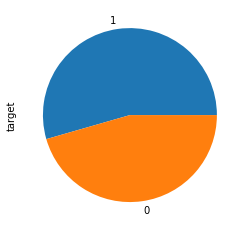

In [9]:
## 165 is a lot, also a gentle reminder to exercise regularly :)
df["target"].value_counts().plot(kind="pie")

In [10]:
## lets check if there is any empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
## specifically use this
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#general information
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

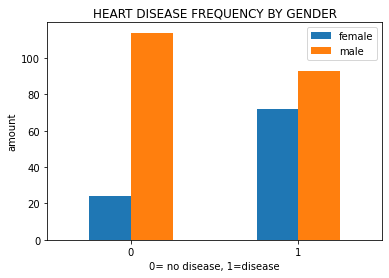

In [16]:
## in the above table we can see that out of 207 males 93 have heart disease, and out of 96 females 72 of them have heart disease.
## now lest create a plot for the same
pd.crosstab(df["target"],df["sex"]).plot(kind="bar")
plt.title("HEART DISEASE FREQUENCY BY GENDER")
plt.xlabel("0= no disease, 1=disease")
plt.ylabel("amount")
plt.legend(["female","male"]); ##put this according to the colour
plt.xticks(rotation=0)

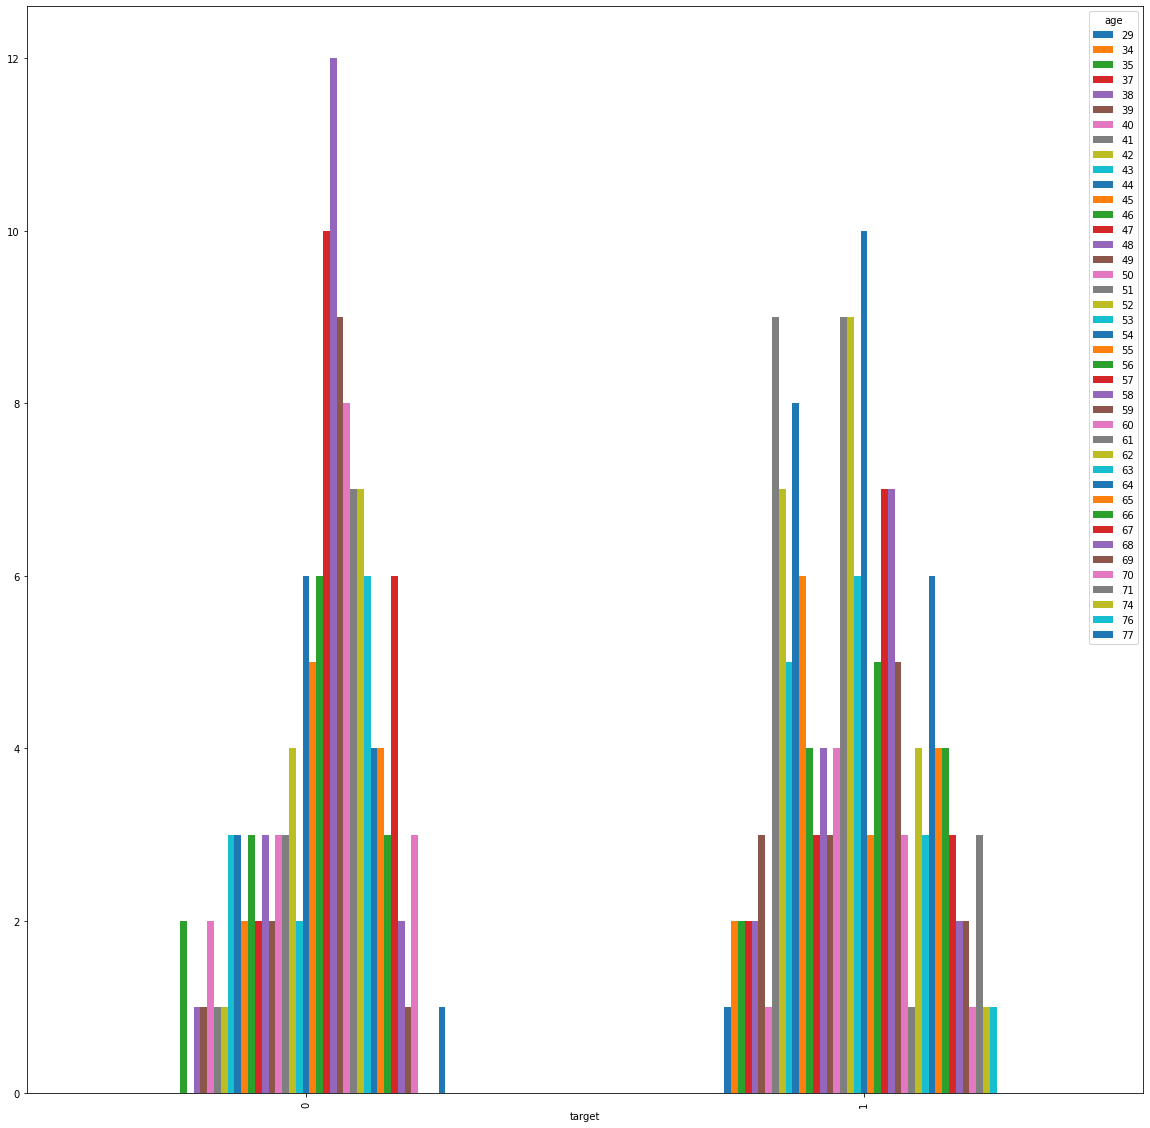

In [17]:
pd.crosstab(df["target"],df["age"]).plot(kind="bar",figsize=(20,20));


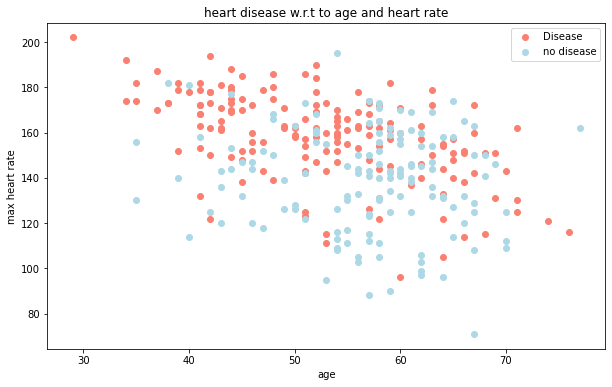

In [18]:

##positive examples(having disease)
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           
           c="salmon")
##negative examples
plt.scatter(
df.age[df.target==0],
           df.thalach[df.target==0],
           
           c="lightblue")

plt.title("heart disease w.r.t to age and heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["Disease","no disease"])

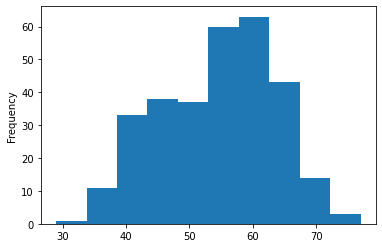

In [19]:
## checking distribution with a histogram
df.age.plot.hist();
##if there are outliers we will be able to figure them out in EDA and we can clean them

In [20]:
## heart disease frequency w.r.t to chest pain type
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


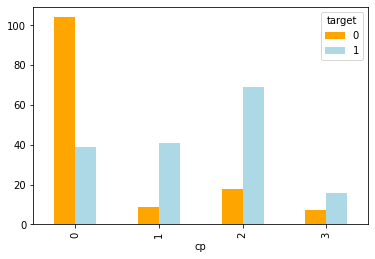

In [21]:

## here we can see even if there is an non angial type, there is a high amount of people with heart disease.
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",color=["orange","lightblue"]);

In [22]:
##building a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


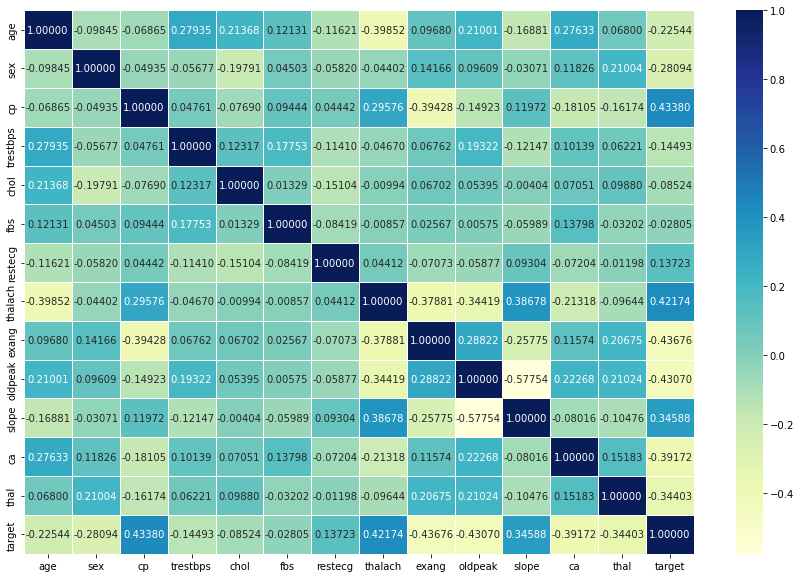

In [23]:
##visulaing the above chaos :)
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              linewidths=0.5,
               annot=True,
              fmt=".5f",
              cmap="YlGnBu");

In [24]:
## as positive corelation increase, the target also increase,as negative corelation increase the target reduces,
## example: exang(exercise angina)is reduced the probability of having heart disease is less, as chest pain increase the target also increases

In [25]:
## preparing opur data for ML
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#split the data into x and y
X= df.drop(["target"],axis=1)
y=df["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
# split data into train,test split 
np.random.seed(101)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1


In [29]:
y_train

86     1
260    0
78     1
150    1
262    0
      ..
40     1
75     1
87     1
63     1
11     1
Name: target, Length: 242, dtype: int64

In [30]:
## time to uild model!!

In [31]:
## we will train it i.e find patterns from the training set and use it on the test set

In [32]:
# we will try 3(or 4) models
#1.Logistic Regression(despite its name it is classification)
#2.K-nearest neighbours
#3.Ensemble classifier
#4 NaivesBayes

In [33]:
#lets put models in a dictionary
models={"Logistic regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random forest":RandomForestClassifier(),
       "NaivesBayes":GaussianNB()}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    ##this is a function to fit and evaluate given ML model
    np.random.seed(101)
    #make a dictionary to keep models
    model_scores={}
    for name ,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [34]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\SOCIAL-OTHERS\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random forest': 0.8360655737704918,
 'NaivesBayes': 0.8524590163934426}

## model comparison

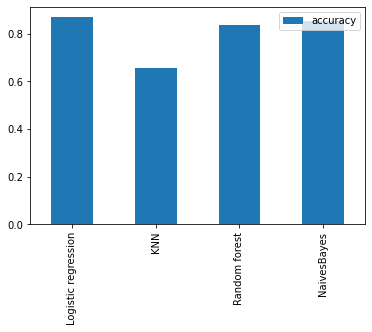

In [35]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [36]:
## revise the evaluation metrics here :)
 
    #we will be evaluating on the folloeing metrics
    #1.Hyperparameter tuning
    #2.Feature importance
    #3.Confusion matrix
    #4.Cross validation
    #5.Precesion
    #6.recall
    #7.F1 score
    #8.Classification report
    #9.ROC curve
    #10.Area under curve(AUC)
    
    #a gentle remindder that 1 and 2 are common to all types of problems, the rest mentioned here are specific to Classification
  

## Hyperparameter tuning 

In [37]:
# tuning KNN
train_scores=[]
test_scores=[]
neighbors=range(1,21)
knn= KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
train_scores

[1.0,
 0.7851239669421488,
 0.731404958677686,
 0.7520661157024794,
 0.7396694214876033,
 0.7355371900826446,
 0.743801652892562,
 0.7231404958677686,
 0.7024793388429752,
 0.7024793388429752,
 0.7148760330578512,
 0.7066115702479339,
 0.6942148760330579,
 0.6983471074380165,
 0.7066115702479339,
 0.7107438016528925,
 0.6942148760330579,
 0.7107438016528925,
 0.7024793388429752,
 0.6942148760330579]

In [38]:
test_scores

[0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6557377049180327,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.6885245901639344,
 0.6557377049180327,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.639344262295082,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344]

Text(0, 0.5, 'model score')

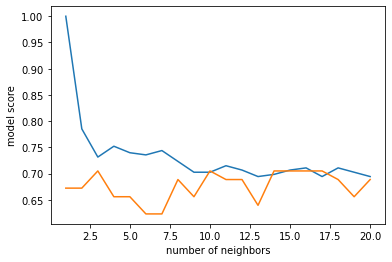

In [39]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="train score")
plt.xlabel("number of neighbors")
plt.ylabel("model score")

In [40]:
print(max(test_scores))

0.7049180327868853


In [41]:
test_scores1=[]
train_scores1=[]
neighbors1=range(1,21)
lr=RandomForestClassifier()
for k in neighbors1:
    lr.set_params()
    lr.fit(X_train,y_train)
    train_scores1.append(lr.score(X_train,y_train))
    test_scores1.append(lr.score(X_test,y_test))

In [42]:
test_scores1


[0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.8688524590163934,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8688524590163934,
 0.819672131147541,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8852459016393442,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934]

In [43]:
train_scores1

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [44]:
print(max(test_scores1))

0.8852459016393442


## hypertuning with RandomizedSearchCV

In [45]:
## we are going to tune logistic regression in regression and randomforestclassification

In [80]:
##creating hyperparameter grid for logistic regression make sure to go through documentaions for what the function does, 
#it is common in industry to not know everything by rote :)
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}

In [81]:
## time to tune using randomized search CV
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [82]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [83]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [84]:

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [85]:
## finding the best hyperparameter
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [86]:
## evaluating randomized search
rs_rf.score(X_test,y_test)

0.8524590163934426

In [88]:
## next we use GRIDSEARCH CV
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [89]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [90]:
gs_log_reg.score(X_test,y_test)

0.8524590163934426

In [91]:
model_scores

{'Logistic regression': 0.8688524590163934,
 'KNN': 0.6557377049180327,
 'Random forest': 0.8360655737704918,
 'NaivesBayes': 0.8524590163934426}

In [93]:
## evaluating our tuned ML model
#ROC curve and AUC score
#Confusion matrix
#classification report
#precesion
# cross validated 
#f1 and recall.

In [94]:
y_preds=gs_log_reg.predict(X_test)# not cross validated

In [95]:
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

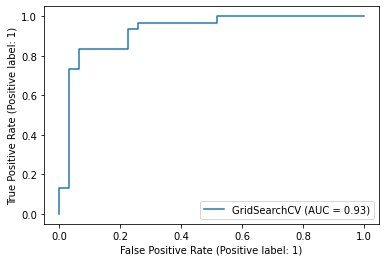

In [96]:
# Plotting the ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [97]:
# confusion matrix, not actually confusing :)
print(confusion_matrix(y_test,y_preds))

[[23  8]
 [ 1 29]]


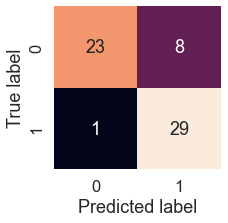

In [102]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [103]:
## classification report, definitley google what this report is about
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



# calculating evaluation metrics using cross validation

In [104]:
# we will be using the best model to evaluate
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [105]:
clf=LogisticRegression(C=0.1082636733874054,
                      solver="liblinear")

In [136]:
## cross validated accuracy
cv_acc=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc=cv_acc.mean()

In [135]:
# cross validated precesion
cv_prec=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="precision")
cv_prec=cv_prec.mean()

In [134]:
# recall with cross validated
cv_recall=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=cv_recall.mean()

In [141]:
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1.mean()

0.8572876223964057

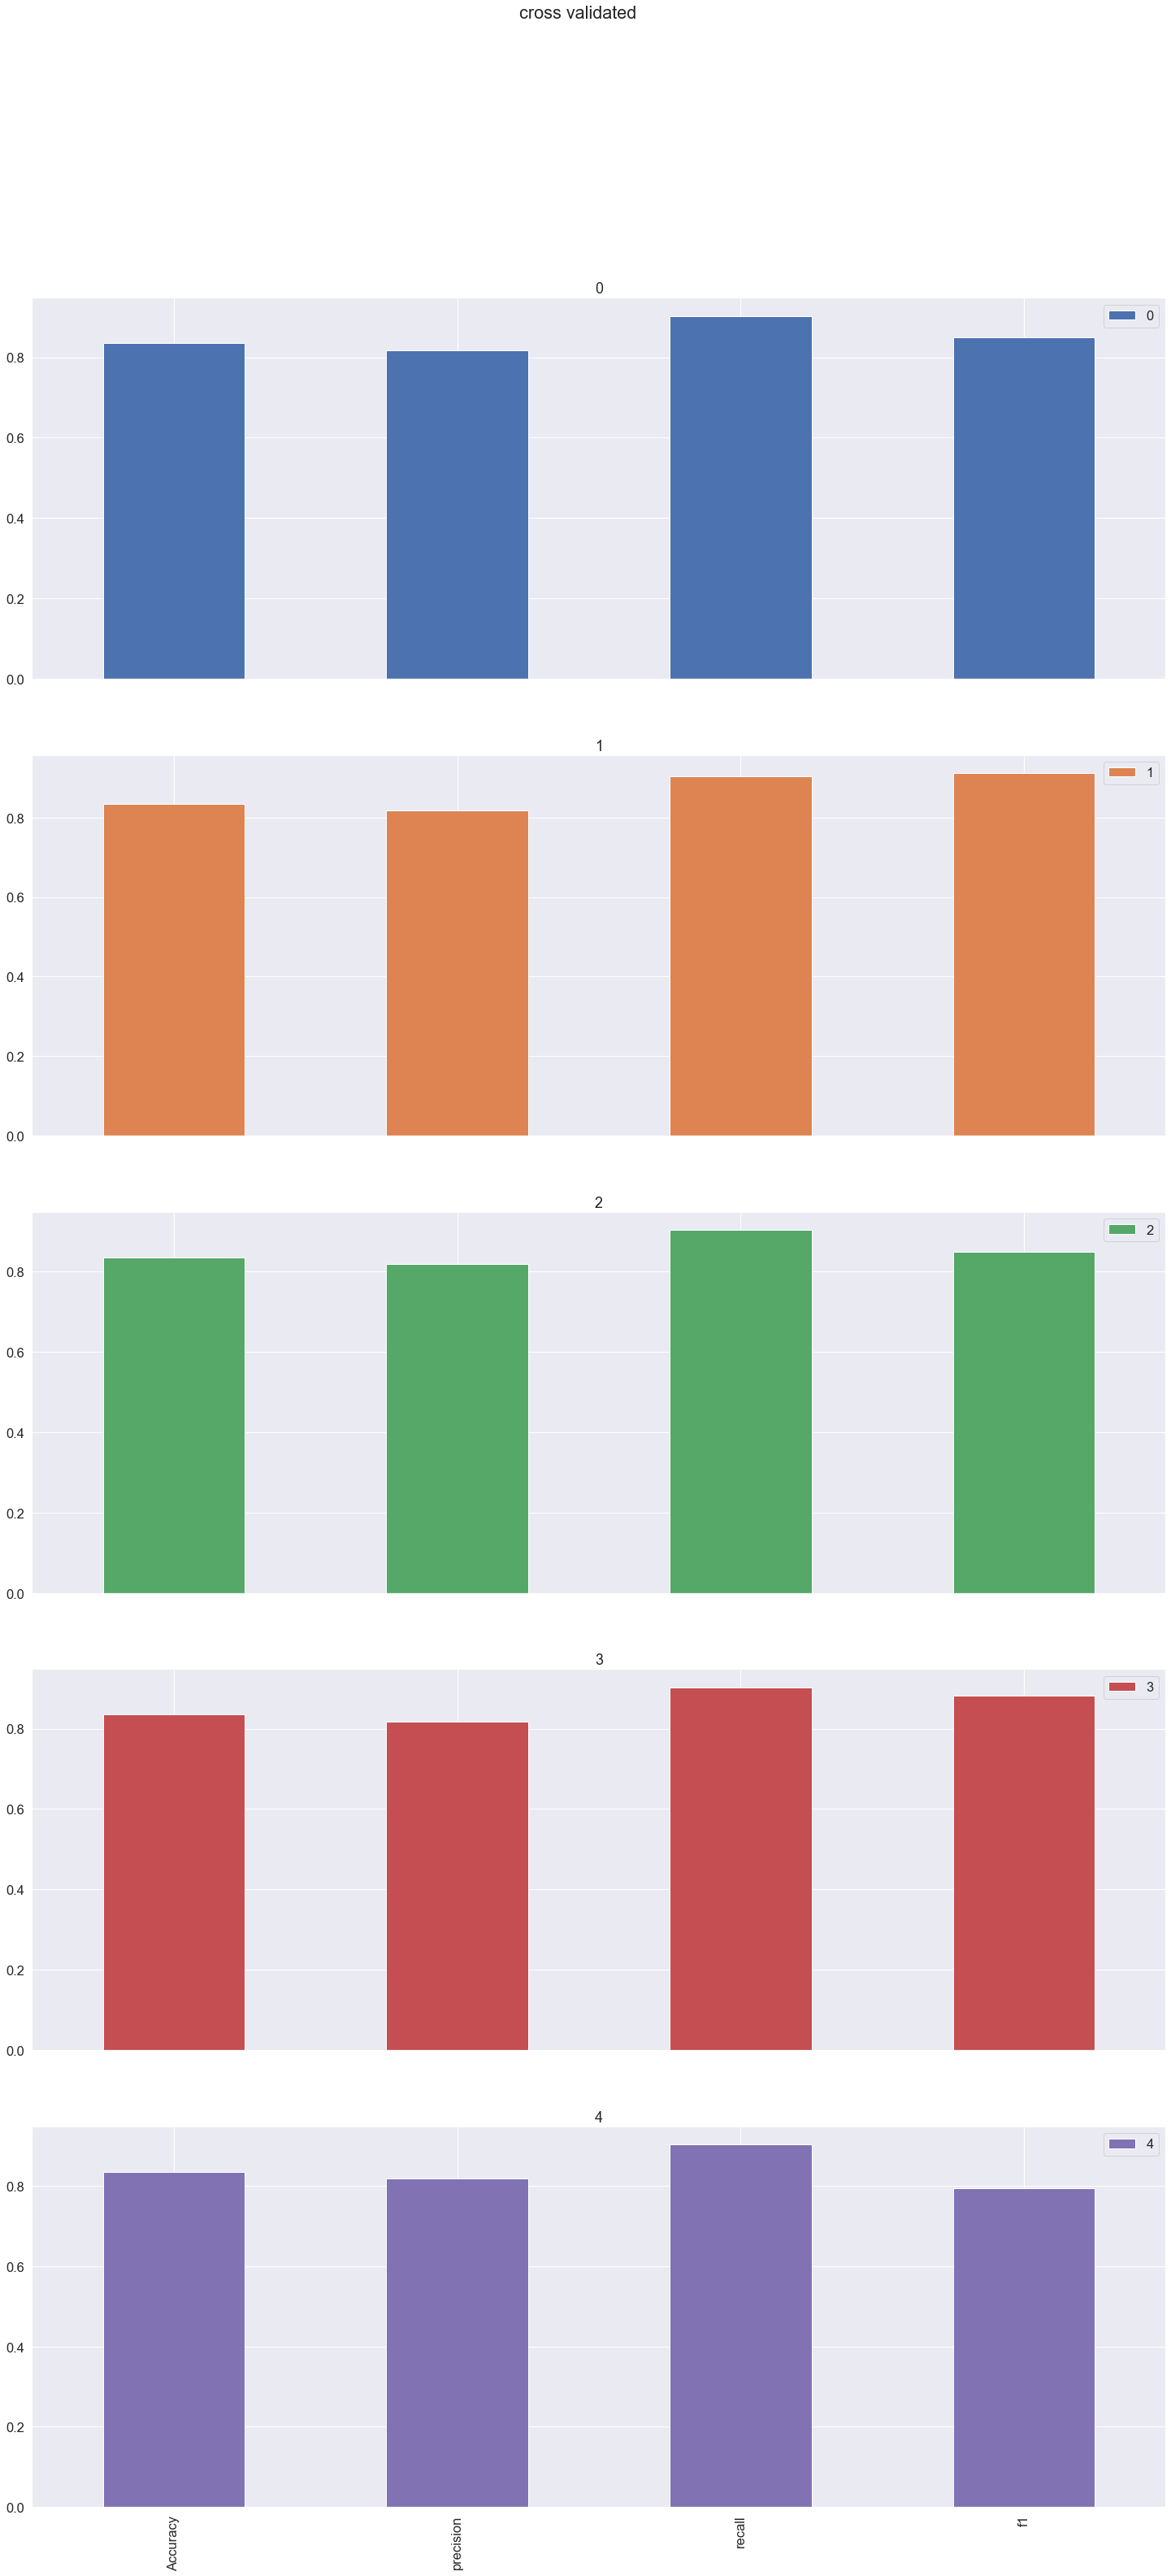

In [143]:
#visulizing the above
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "precision":cv_prec,
                        "recall":cv_recall,
                        "f1":cv_f1},
                         
                       )
cv_metrics.T.plot.bar(title="cross validated ",subplots=True,figsize=(25,50));

## feature importance
feature importance is another way of telling"which contributed the most and how did they contribute to the model?"

In [144]:
#feature importance is different for each model here we do it for logisctic regression model only
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [145]:
clf= LogisticRegression(C=0.1082636733874054,
                       solver="liblinear")

In [146]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [147]:
clf.coef_

array([[ 0.00728048, -0.51686656,  0.66589462, -0.01487605, -0.00340645,
         0.03104055,  0.18161848,  0.02644686, -0.42354452, -0.40308078,
         0.31469644, -0.59328254, -0.5324176 ]])

In [148]:
# matching coeffs of features to coloumns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.007280483928876824,
 'sex': -0.5168665639471859,
 'cp': 0.665894618421542,
 'trestbps': -0.014876053924733115,
 'chol': -0.003406452166781076,
 'fbs': 0.0310405463452144,
 'restecg': 0.1816184775877602,
 'thalach': 0.02644686393013526,
 'exang': -0.4235445190012562,
 'oldpeak': -0.40308077821666516,
 'slope': 0.3146964398380468,
 'ca': -0.5932825430182157,
 'thal': -0.5324175995778558}

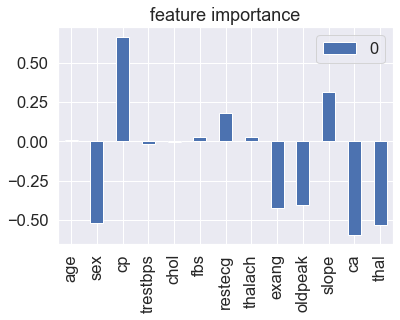

In [151]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance");

In [153]:
# the ones below are negative correlations i.e the lower the value the higher the probability
#notice that we havent reached our goal of hitting 95% accuracy, does that mean this is the end of the project? NO!
#we can do the following and try again:
#Could you collect more cata
#Could you try a better model? 
#Could you improve the current models? (beyond what we've done so far)
#Now assume that we have hit our goal, now ponder over:
#If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?
#With this, good luck until next time!